# Dynamic Pricing 

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset and make dataframe

In [2]:
df = pd.read_csv(r'C:\Users\UNIQUE\Desktop\Jupyter\Project4Reg_dynamic_pricing\dataset\dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

- datasets does not have null values

### Let do 5 checks
1. null values
2. outliers
3. data types
4. duplicates
5. 

#### 1. Null Values


In [6]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

- NO null values present

#### 2. Duplicates


In [7]:
df.duplicated().sum()

0

- No duplicate values are present

#### 3 Data Types

convert each feature to suitable numerical feature

In [8]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [9]:
df['Number_of_Riders'].dtypes

dtype('int64')

In [10]:
obj_feature=[i for i in df.columns if df[i].dtypes == 'O']
obj_feature

['Location_Category',
 'Customer_Loyalty_Status',
 'Time_of_Booking',
 'Vehicle_Type']

In [11]:
df['Location_Category'].value_counts()

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

In [12]:
df['Customer_Loyalty_Status'].value_counts()

Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

In [13]:
df['Time_of_Booking'].value_counts()

Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

In [14]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64

<b>Let see correaltion between numeric feature

In [15]:
df.drop(columns= obj_feature).corr()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.627016,0.029265,0.008572,-0.015856,0.005826
Number_of_Drivers,0.627016,1.000000,0.039660,0.041204,-0.024418,0.017082
Number_of_Past_Rides,0.029265,0.039660,1.000000,-0.064734,0.030679,0.035859
Average_Ratings,0.008572,0.041204,-0.064734,1.000000,-0.016968,-0.001063
Expected_Ride_Duration,-0.015856,-0.024418,0.030679,-0.016968,1.000000,0.927547
Historical_Cost_of_Ride,0.005826,0.017082,0.035859,-0.001063,0.927547,1.000000


<Axes: >

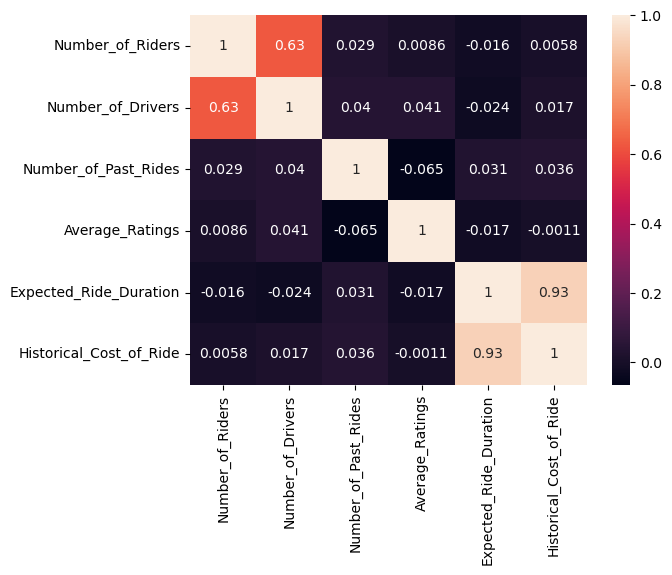

In [16]:
sns.heatmap(df.drop(columns= obj_feature).corr(),annot =True)

- There is good relation between Number of Riders and number of drivers .
- Expected Ride Duration and  Historical Cost of Ride are highly correlated .

<Axes: xlabel='Location_Category', ylabel='count'>

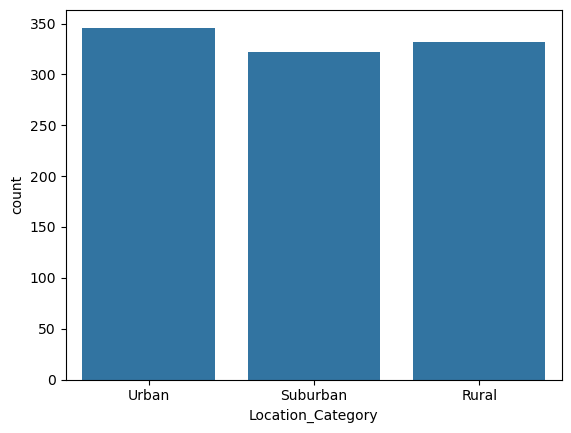

In [17]:
sns.countplot(x = df['Location_Category'])

In [18]:
['Location_Category',
 'Customer_Loyalty_Status',
 'Time_of_Booking',
 'Vehicle_Type']

['Location_Category',
 'Customer_Loyalty_Status',
 'Time_of_Booking',
 'Vehicle_Type']

In [19]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

#### 4. Check for Outliers

<Axes: xlabel='Average_Ratings'>

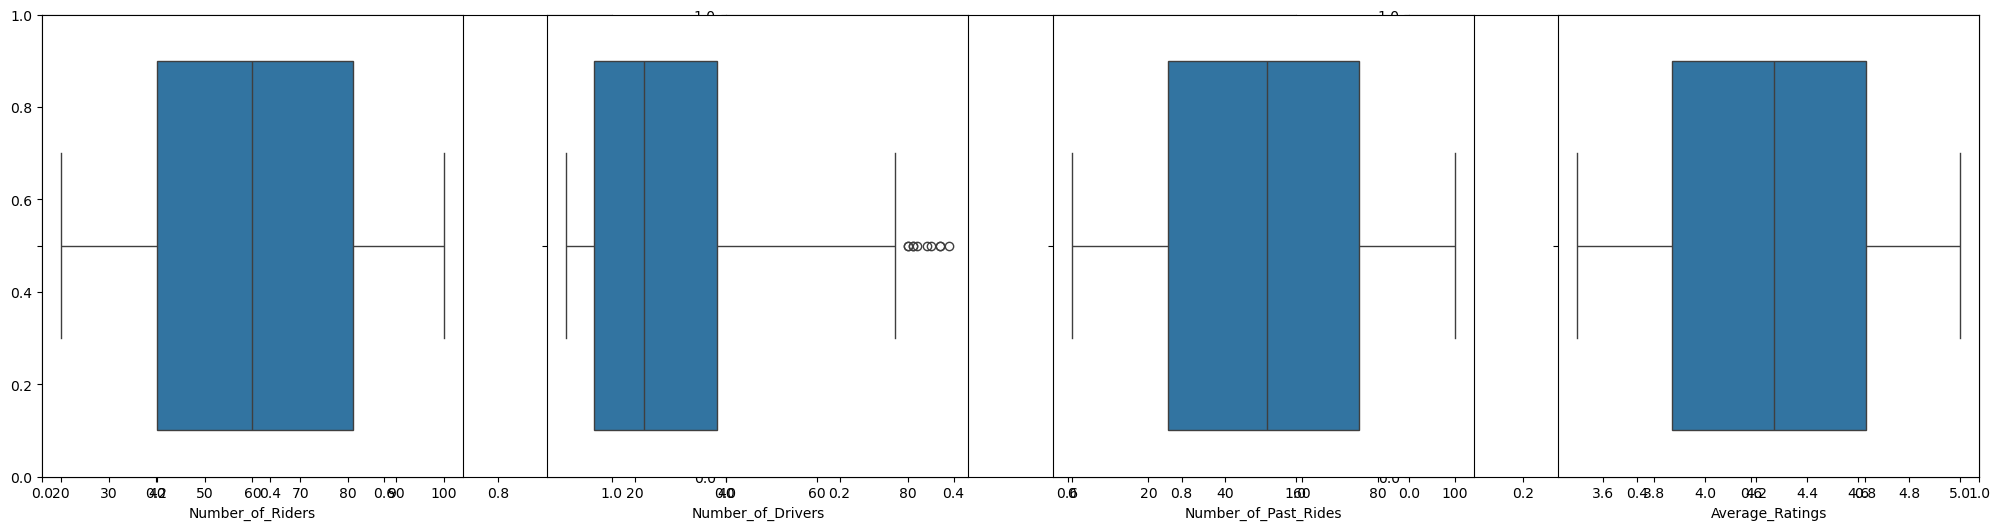

In [20]:
plt.subplots(1,3,figsize  =(25,6))
plt.subplot(141)
sns.boxplot(data =df,x = 'Number_of_Riders')
plt.subplot(142)
sns.boxplot(data =df,x = 'Number_of_Drivers')
plt.subplot(143)
sns.boxplot(data =df,x = 'Number_of_Past_Rides')
plt.subplot(144)
sns.boxplot(data = df, x = 'Average_Ratings')


<Axes: xlabel='Expected_Ride_Duration'>

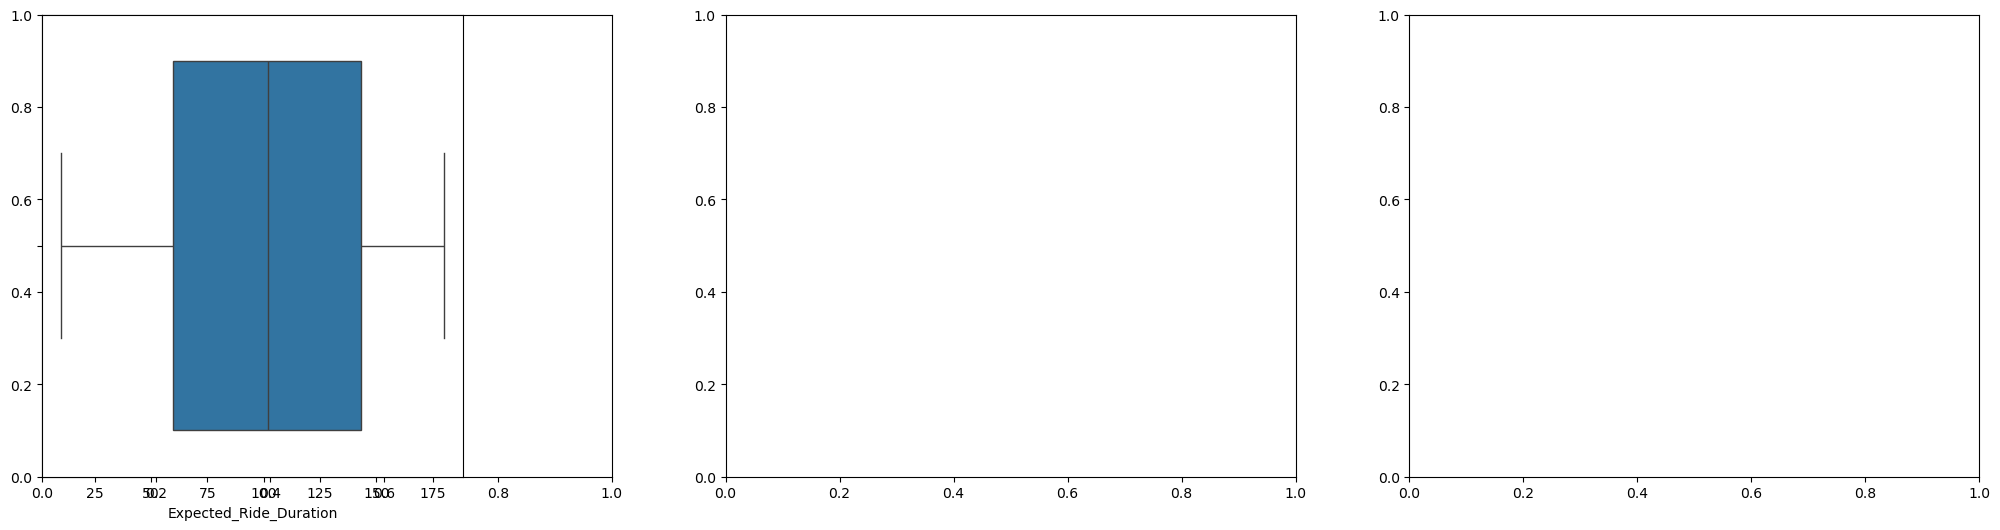

In [21]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.boxplot(data = df,x ='Expected_Ride_Duration')


<Axes: xlabel='Expected_Ride_Duration', ylabel='Historical_Cost_of_Ride'>

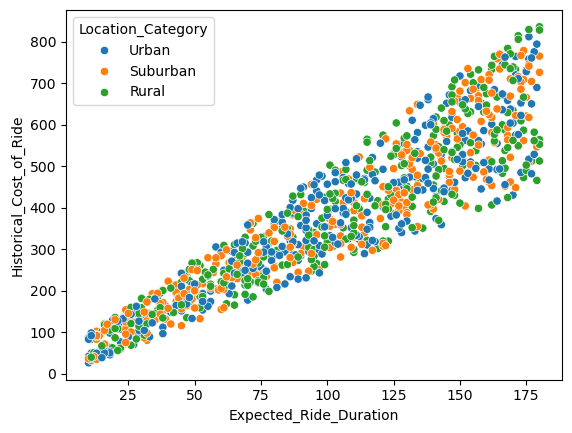

In [22]:
sns.scatterplot(x = df['Expected_Ride_Duration'],y = df['Historical_Cost_of_Ride'],hue=df['Location_Category'])

## Feture Engineering

### Turn categorical features to numerical

In [23]:
obj_feature

['Location_Category',
 'Customer_Loyalty_Status',
 'Time_of_Booking',
 'Vehicle_Type']

In [24]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [25]:
# Ordinal encoder is used for Ordinal data,therefore we will use LabelEncoder for data that have order,rank.


In [26]:
# One hot encoder is used for Nominal data,that does not have any order


In [27]:
df['Location_Category'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [28]:
# Location category has some order Rural -> Suburban -> Urban
# create copy of df ,to do feature engineering

In [29]:
df_copy = df.copy()
df_copy.head(3)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469


In [30]:
# let encoder Location category
ordinalencoder = OrdinalEncoder(categories = [['Rural','Suburban','Urban']])

In [31]:
df_copy['Location_Category_encode'] = ordinalencoder.fit_transform(df_copy[['Location_Category']])

In [32]:
# column : 'Customer_Loyalty_Status'
df_copy['Customer_Loyalty_Status'].unique()

array(['Silver', 'Regular', 'Gold'], dtype=object)

In [33]:
#'Customer_Loyalty_Status' also have order Regular -> Silver -> Gold
ordinalencoder = OrdinalEncoder(categories = [['Regular','Silver','Gold']])
df_copy['Customer_Loyalty_Status_encode'] = ordinalencoder.fit_transform(df_copy[['Customer_Loyalty_Status']])

In [34]:
# Time of Booking
df_copy['Time_of_Booking'].unique()

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# time of booking is not order .


In [37]:
onehotencoder= OneHotEncoder(sparse_output = False)
encoded_data= onehotencoder.fit_transform(df_copy[['Time_of_Booking']])

In [38]:
encoded_data = pd.DataFrame(encoded_data,columns = onehotencoder.get_feature_names_out(['Time_of_Booking']))

In [39]:
df_copy = pd.concat([df_copy,encoded_data],axis = 1)
df_copy.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Location_Category_encode,Customer_Loyalty_Status_encode,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.0,1.0,0.0,0.0,0.0,1.0
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.0,1.0,0.0,1.0,0.0,0.0
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0.0,1.0,1.0,0.0,0.0,0.0
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0.0,0.0,1.0,0.0,0.0,0.0
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
df_copy['Vehicle_Type'].unique()

array(['Premium', 'Economy'], dtype=object)

In [41]:
labelencoder = LabelEncoder()
df_copy['Vehicle_Type_encode'] = labelencoder.fit_transform(df_copy['Vehicle_Type'])

In [42]:
df_copy.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Location_Category_encode',
       'Customer_Loyalty_Status_encode', 'Time_of_Booking_Afternoon',
       'Time_of_Booking_Evening', 'Time_of_Booking_Morning',
       'Time_of_Booking_Night', 'Vehicle_Type_encode'],
      dtype='object')

In [43]:
# Now drop object dtype feature as we already have ther encoded columns

In [44]:
df_copy = df_copy.drop(columns = obj_feature)
df_copy.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride',
       'Location_Category_encode', 'Customer_Loyalty_Status_encode',
       'Time_of_Booking_Afternoon', 'Time_of_Booking_Evening',
       'Time_of_Booking_Morning', 'Time_of_Booking_Night',
       'Vehicle_Type_encode'],
      dtype='object')

In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number_of_Riders                1000 non-null   int64  
 1   Number_of_Drivers               1000 non-null   int64  
 2   Number_of_Past_Rides            1000 non-null   int64  
 3   Average_Ratings                 1000 non-null   float64
 4   Expected_Ride_Duration          1000 non-null   int64  
 5   Historical_Cost_of_Ride         1000 non-null   float64
 6   Location_Category_encode        1000 non-null   float64
 7   Customer_Loyalty_Status_encode  1000 non-null   float64
 8   Time_of_Booking_Afternoon       1000 non-null   float64
 9   Time_of_Booking_Evening         1000 non-null   float64
 10  Time_of_Booking_Morning         1000 non-null   float64
 11  Time_of_Booking_Night           1000 non-null   float64
 12  Vehicle_Type_encode             100

## Split data in traing and Testing dataset

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_copy.drop(columns =['Historical_Cost_of_Ride'])
y= df_copy['Historical_Cost_of_Ride']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 12), (200, 12), (800,), (200,))

In [49]:
X.shape

(1000, 12)

In [50]:
X_train.shape

(800, 12)

In [51]:
X_test.shape

(200, 12)

In [52]:
X_test.head()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_encode,Customer_Loyalty_Status_encode,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_encode
521,38,8,78,3.57,114,2.0,1.0,0.0,0.0,0.0,1.0,0
737,83,18,12,4.98,81,2.0,2.0,0.0,0.0,1.0,0.0,0
740,22,7,15,3.53,180,2.0,2.0,0.0,1.0,0.0,0.0,1
660,29,13,44,4.29,87,1.0,2.0,0.0,1.0,0.0,0.0,1
411,91,14,19,4.78,19,1.0,1.0,0.0,0.0,0.0,1.0,1


In [53]:
y

0      284.257273
1      173.874753
2      329.795469
3      470.201232
4      579.681422
          ...    
995     91.389526
996    424.155987
997    157.364830
998    279.095048
999    655.065106
Name: Historical_Cost_of_Ride, Length: 1000, dtype: float64

## Model Selection 
we will use Random Forest Regressor

#### 1. Import Model

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [55]:
from sklearn.metrics import r2_score

#### 2. Train Model

In [86]:
# Intialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators = 50,random_state=42)

# Train the model
rf_model.fit(X_train,y_train)

# Make Prediction
y_pred = rf_model.predict(X_test)


#### 3. Evaluate Model Performance

In [57]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred)
mae

55.807628175207356

In [58]:
r2score= r2_score(y_test,y_pred)
r2score

0.8483813976587727

##  Hyperparameter Tunning

### Grid Serach CV

In [59]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Define Parameters
param_grid= {
    'n_estimators' :[10,20,30,50,100],
    'max_depth' : [None,5,10,20],
    'min_samples_split' : [1,2,5,10],
    'min_samples_leaf' : [1,2,3],
    'max_features' : ['auto','sqrt'] 
}
# Initialize Random Forest Model
rf_model = RandomForestRegressor(random_state= 42)

# Perform Grid Search
random_cv = RandomizedSearchCV(rf_model,param_grid,cv =5,scoring = 'neg_mean_absolute_error',n_jobs = -1)
random_cv.fit(X_train,y_train)

# Best Parameters
print("Best Parameters:",
random_cv.best_params_)

# Evalute with Best Model
best_rf = random_cv.best_estimator_
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"Optimized MAE : {mae:.2f}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Optimized MAE : 61.75


In [62]:
r2_score(y_test,y_pred)


0.834628655668635

In [75]:
X_train.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Location_Category_encode',
       'Customer_Loyalty_Status_encode', 'Time_of_Booking_Afternoon',
       'Time_of_Booking_Evening', 'Time_of_Booking_Morning',
       'Time_of_Booking_Night', 'Vehicle_Type_encode'],
      dtype='object')

In [83]:
X_train.iloc[[0]]

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_encode,Customer_Loyalty_Status_encode,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_encode
29,57,38,54,4.1,131,1.0,1.0,0.0,0.0,0.0,1.0,1


In [87]:
rf_model.predict(X_train.iloc[[0]])

array([528.87291419])

### Export Model

In [88]:
import pickle

In [89]:
# save model to file

with open(r'C:\Users\UNIQUE\Desktop\Jupyter\Project4Reg_dynamic_pricing\model\rf_model.pkl','wb') as file:
    pickle.dump(rf_model,file)

print('Model saved successfully !')

Model saved successfully !
